Use the button below to see raw code in the analysis, otherwise read ahead!

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View raw code"></form>''')

# Historical Air Temperature & Snow Density Analysis, Part I 

## *Completed for*: Bridger Teton Avalanche Center  

## Patrick Wright, Inversion Labs

## Feb 4 2016



**CONTENTS:**

**1. Problem statement & density definition**

**2. Intro to Statistics**

**3. Summary and Results**

**4. Analaysis and plots**

# 1. Problem Statement

New snow density is a key parameter for daily forecasting of avalanche hazard. However, there is currently not a reliable automated measurement of new snow density to provide data for the daily avalanche bulletin issued at 6 AM. Precipitation gauges at automated weather stations at JHMR provide water content data, but are generally unreliable. Manually measured snow density data is collected daily (mid to late morning) and is the most accurate measure of snow density available. Although this data is not available for the 6AM daily bulletin, a relationship between snow density and air temperature provides the ability to estimate snow water content using approximate air temperatures during the precipitation event.

Previous analysis of historical data (plot on wall of BTAC) shows a relationship between manually measured new snow density and air temperature. This study will attempt to validate this relationship using historical daily data from December 1974 to January 2016.

**Existing plot:**

In [2]:
from IPython.display import Image

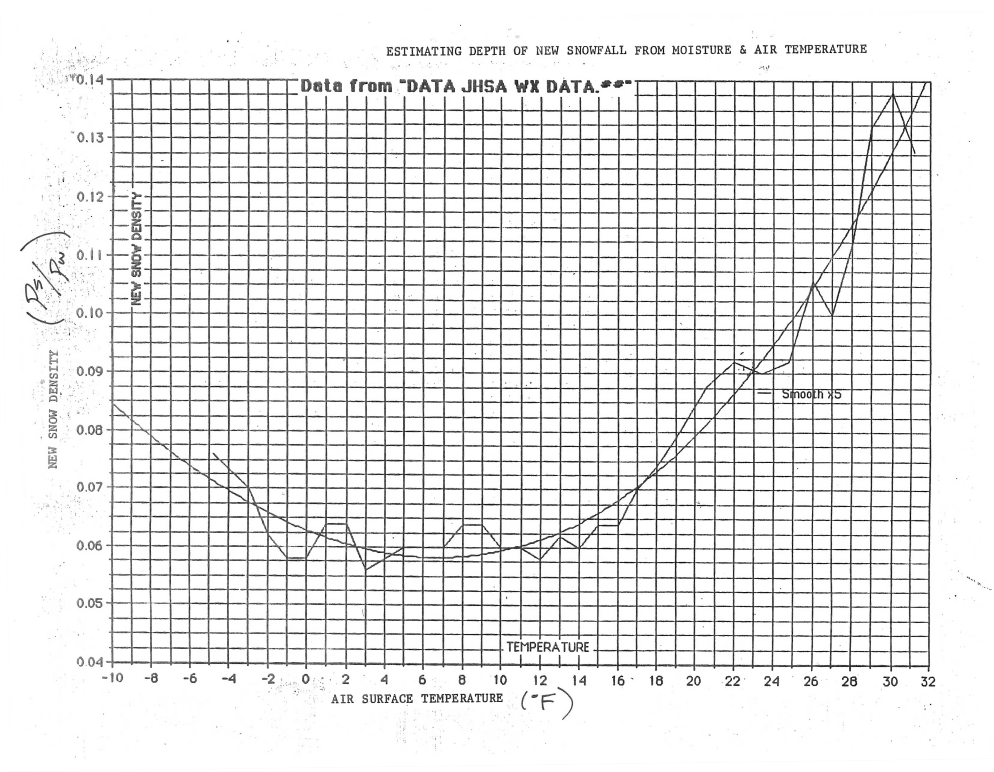

In [3]:
Image(filename='wallplot.png')

## Depth, Density, and SWE

With actual units:

**depth (m) x density (kg/m<sup>3</sup>) = SWE (kg/m<sup>2</sup>)**

If density is expressed as unitless fraction:

**density = (density<sub>snow</sub>) / (density<sub>H2O</sub>)**, 

where density<sub>H2O</sub> = 1000 kg/m<sup>3</sup>

Then,

**depth (m) x [ (density<sub>snow</sub>) / (density<sub>H2O</sub>) ] = SWE (m)**

Now density can be expressed as:

**density (unitless) = SWE (m) / depth (m)**

Density in this analysis is expressed as above (with SWE and depth units in inches)


# 2. Intro to statistics

As a first approach, we will use **least squares regression** to approximate a best-fit model between air temperature (predictor variable) and snow density (response variable).

A least squares regression fit attempts to minimize the sum of the squared residuals. I'll examine linear models, including 1st order, 2nd order quadratic, and 3rd order cubic.

**To consider in any correlation analysis:**

* All predictor variables that have a significant effect on the response variable (density) should be included. What are the causal relationships and process-level reasoning for selecting variables that are in the model? What variables are important to the process being studied and why? Failure to include relevant variables occurs due to insufficient knowledge or ability to measure the relevant processes.

>*We know that air temp is not the only variable affecting snow density. Wind speed and direction are also directly influential (to be analyzed in part II). We also must consider any process that can change the snow density between the time when it was deposited and the time it was measured, including settlement, wind redistribution, and solar radiation/sublimation. These variables will likely remain in the model, with the assumption that daily measured snow density approximately corresponds to the density of the new snow that fell during some period in the previous 24 hrs.*

>*We will be using 24-hr mean air temperature, and we also make the assumption that this approximately represents the mean air temperature during the precip event.*

* Variables that are included should have good measures

>*There is obvious artificial bias in the density dataset at 0.10 and 0.05.*

* Residual plots should be assessed to make sure that the model fits the data. Least squares regression assumes the data has a parametric (normal) distribution.

>*Residuals should not have patterns but be a random scatter of points centered at zero. Patterns in the residuals indicate that some other predictor variable is present in the error, and is not captured by the model. For a least squares regression analysis, residuals should also be normally distributed (however, with a large sample non-normality is not necessarily a problem...)*

**For regression analysis, important indicators include:**

* **p-value:** Tests the null hypothesis that the coefficient is equal to zero (no effect on response). A low p-value (< 0.05) indicates that you can reject the null hypothesis (5% risk of concluding that an association exists when there is no actual association.) If p-values are low, there is indication of statistical significance. 

* **R<sup>2</sup> ( coefficient of determination):** measures the strength of the relationship between the predictor and the response variable. Provides fraction of the response variable variation that is explained by the linear model. 0.0 indicates the model explains none of the variability of the response data around its mean. 1.0 indicates the model explains all the variability (all data points fall on the regression line). Low R<sup>2</sup> does not mean the relationship is insignificant, but low R<sup>2</sup> can be problematic for making precise predictions with the data.

* **Standard error (S):** standard error of the regression. Average distance that the observed values fall from the regression line.

In addition, any analysis should include:

* **Confidence and Predictions Intervals**

>**95% Confidence interval:** range of likely values for the mean response.

>**95% Prediction interval:** range of likely values for a single new observation.

We will also use **quantile regression (QR)** to:

* Examine relationships throughout the distribution of the response variable (density), not just the mean response (least squares regression).

* Quantify the variation in the response distribution. QR allows calculation of prediction intervals for non-parametric (non-normal) data.

* Help support conclusions reached through regression analysis.




# 3. Summary and Results

**Potential problems with analysis:**
* Excluding additional important predictor variables (wind)
* Inadequate number of measurements at low end of temp range
* Artificial bias of data at 0.10 and 0.05
* Outliers: ( Density > .25 were removed, could we potentially remove more?)
* P-values can be misleading: high N can lead to false statistical significance of linear regression assessments (quantile regression plots are useful in this case)


**Major conclusions:**
* Changes in air temp are associated with changes in density, although there is large variability in the data surrounding the best fit model. The 1st-order linear model shows p-values < 0.05, indicating statistical significance of the fit, and the 2nd-order polynomial fit shows a p-value > 0.05, indicating the fit is *not* statistically significant. However, p-values may not be the most reliable indicators.
* Not clear whether there is stronger reason statistically to use the 1st-order linear or the 2nd-order polynomial fit.
* As shown by a fairly tight confidence interval, the model accurately represents the mean of the density data for any given temperature.
* However, the predictive ability of the model is not strong (predictions will have low precision). Numerically, this is represented by low R^2, relatively large prediction intervals, and relatively high standard error.
* Quantile regression confirms a large distribution in the response variable around the mean, and gives a non-parametric estimate of various prediction intervals.

**OVERALL:** 

>Using temperature as a single predictor of density is not a robust relationship. On average, the regression line will provide a relationship between temperature and density, but it must be used in context with the large variability in the data. Making single predictions using the model relationship is not supported by the data. However, using this historical dataset to generate the best-fit line (and corresponding equation) will be a more accurate tool than what is currently used by the BTAC.

**Next steps (Part II):** 
* Multiple regression with wind as a second predictor variable.
* Include additional sites.

# 4. Analysis and plots

**Code below for purposes of full documentation.**

In [4]:
import numpy as np
import scipy as sp
from scipy import stats
import scipy.stats as stats
import pylab 
import pandas as pd
from IPython import embed
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf

# --------------------------------------------------------------------------
# Define some functions for making histograms:

def histoplot_normal(data,titlestring):
    num_bins= 100
    fig10 = plt.figure(figsize=(9 * 1.618, 9))
    ax = fig10.add_subplot(111)
    n, bins, patches = plt.hist(data, num_bins, normed=1, facecolor='blue', alpha = 0.5)
    y = mlab.normpdf(bins, np.mean(data), np.std(data))
    plt.plot(bins, y, 'k--')
    plt.axvline(x=np.median(data), ymin=0, ymax=180, linewidth=1, color='r')
    plt.axvline(x=np.mean(data), ymin=0, ymax=180, linewidth=1, color='k')
    ax.set_title(titlestring, fontsize=14)
    ax.set_xlabel('residuals', fontsize=14)
    ax.set_ylabel('probability density', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

def histoplot(data,titlestring):
    num_bins=(2323 / 10)
    fig10 = plt.figure(figsize=(9 * 1.618, 9))
    ax = fig10.add_subplot(111)
    n, bins, patches = plt.hist(data, num_bins, normed=1, facecolor='blue', alpha = 0.5)
    ax.set_title(titlestring, fontsize=14)
    ax.set_xlabel('density', fontsize=14)
    ax.set_ylabel('# measurements / 10', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

# --------------------------------------------------------------------------
print "Processing datafiles..."

# Define directory paths:
fpath_1='dbo.HistoricalWeatherTable_20160103.csv' # historical data
fpath_2='dbo.Teton_AM_Forecast_Data.csv' # temps since 2002

# Read in data:
data1 = pd.read_csv(fpath_1, sep=',')
data2 = pd.read_csv(fpath_2, sep=',')

# Drop last entry of data1 (NaN for date, no data)
data1 = data1[:-1]

# Convert datetime strings to a Pandas datetime object
timestamp1 = data1['fldDate']
dt1 = pd.to_datetime(timestamp1, infer_datetime_format=True)
timestamp2 = data2['fldDate']
dt2 = pd.to_datetime(timestamp2, infer_datetime_format=True)

# set index of dataframes to datetime
data1_dt = data1.set_index(dt1)
data2_dt = data2.set_index(dt2)

# get rid of redundant date column:
data1_dt.drop('fldDate', axis=1, inplace=True)
data2_dt.drop('fldDate', axis=1, inplace=True)

# BUILD CONTINUOUS TEMP SERIES:
# Grab current/max/min from data1 (1974-12-16 thru 2002-01-30)
CurTemp1 = data1_dt.CurTempMid[:'2002-01-30']
MaxTemp1 = data1_dt.MaxTempMid[:'2002-01-30']
MinTemp1 = data1_dt.MinTempMid[:'2002-01-30']

# Grab current/max/min from data2 (2002-01-31 thru 2016-01-03)
CurTemp2 = data2_dt.CurTempMid
MaxTemp2 = data2_dt.MaxTempMid
MinTemp2 = data2_dt.MinTempMid

# Define two corresponding series as a list
CurTemp_data = [CurTemp1, CurTemp2]
MaxTemp_data = [MaxTemp1, MaxTemp2]
MinTemp_data = [MinTemp1, MinTemp2]

# Concat to one continuous variable
CurTempMid = pd.concat(CurTemp_data)
MaxTempMid = pd.concat(MaxTemp_data)
MinTempMid = pd.concat(MinTemp_data)

# Count NaNs in concatenated temp data
NaNcount_Cur = CurTempMid.isnull().sum()
fractNaN_Cur = float(NaNcount_Cur) / float(len(CurTempMid))
NaNcount_Max = MaxTempMid.isnull().sum()
fractNaN_Max = float(NaNcount_Max) / float(len(MaxTempMid))
NaNcount_Min = MinTempMid.isnull().sum()
fractNaN_Min = float(NaNcount_Min) / float(len(MinTempMid))

print '------------------------------'
print 'NaN VALUES IN RAW TEMP DATA:'
print "%s NaN values in CurTempMid" %NaNcount_Cur
print "%f of data" %fractNaN_Cur 
print "%s NaN values in MaxTempMid" %NaNcount_Max
print "%f of data" %fractNaN_Max
print "%s NaN values in MinTempMid" %NaNcount_Min
print "%f of data" %fractNaN_Min 
print '------------------------------'

# Need continuous daily temp data to match length with snow data
# RESAMPLE (runs through summers)
CurTempMid_resample = CurTempMid.resample('1D')
MaxTempMid_resample = MaxTempMid.resample('1D')
MinTempMid_resample = MinTempMid.resample('1D')

# SNOW DATA:
# Count initial NaNs in snow data:
NaNcount_newsnow = data1_dt.NewSnowMid.isnull().sum()
fractNaN_newsnow = float(NaNcount_newsnow) / float(len(data1_dt.NewSnowMid))
NaNcount_SWE = data1_dt.SWEMid.isnull().sum()
fractNaN_SWE = float(NaNcount_SWE) / float(len(data1_dt.SWEMid))

print 'NaN VALUES IN RAW SNOW/SWE DATA'
print "%s NaN values in NewSnowMid" %NaNcount_newsnow
print "%f of data" %fractNaN_newsnow 
print "%s NaN values in SWEMid" %NaNcount_SWE
print "%f of data" %fractNaN_SWE
print '------------------------------'

print 'Dropping any new snow entries <=1"'

NewSnowMid_countzero = data1_dt.NewSnowMid[data1_dt.NewSnowMid == 0.0]
NewSnowMid_drop = data1_dt.NewSnowMid[data1_dt.NewSnowMid > 1.0]

lessthaninch = len(data1_dt.NewSnowMid) - len(NewSnowMid_drop) - len(NewSnowMid_countzero)
totaldrop = len(data1_dt.NewSnowMid) - len(NewSnowMid_drop)

print '%s entries in NewSnowMid with snow totals <=1"' %lessthaninch
print 'Dropping %s entries from NewSnowMid (including 0" entries)' %totaldrop
print '------------------------------'

# Match length with temp data
NewSnowMid_resample = NewSnowMid_drop.resample('1D')
SWEMid_resample = data1_dt.SWEMid.resample('1D')

densityMid = SWEMid_resample / NewSnowMid_resample 

# Drop outlier high density records
highdens = len(densityMid[densityMid >= 0.25])
print 'Dropping %s outlier high density records (>0.25)' %highdens
densityMid = densityMid[densityMid < 0.25]

# Calc mean air temp:
temp_mean = (MaxTempMid_resample + MinTempMid_resample) / 2.

# Get index only for entries where both temp and density are integers (non-NaN):
idx_mean = np.isfinite(temp_mean) & np.isfinite(densityMid)
idx_min = np.isfinite(MinTempMid_resample) & np.isfinite(densityMid)
idx_max = np.isfinite(MaxTempMid_resample) & np.isfinite(densityMid)
idx_current = np.isfinite(CurTempMid_resample) & np.isfinite(densityMid)

x_mean = temp_mean[idx_mean]
x_min = MinTempMid_resample[idx_min]
x_max = MaxTempMid_resample[idx_max]
x_current = CurTempMid_resample[idx_current]
y_mean = densityMid[idx_mean]
y_min = densityMid[idx_min]
y_max = densityMid[idx_max]
y_current = densityMid[idx_current]

print '------------------------------'
print '# of data points for analysis (using mean temp): %s' %len(y_mean)

Processing datafiles...
------------------------------
NaN VALUES IN RAW TEMP DATA:
576 NaN values in CurTempMid
0.080245 of data
617 NaN values in MaxTempMid
0.085957 of data
620 NaN values in MinTempMid
0.086375 of data
------------------------------
NaN VALUES IN RAW SNOW/SWE DATA
361 NaN values in NewSnowMid
0.048114 of data
950 NaN values in SWEMid
0.126616 of data
------------------------------
Dropping any new snow entries <=1"
2111 entries in NewSnowMid with snow totals <=1"
Dropping 4921 entries from NewSnowMid (including 0" entries)
------------------------------
Dropping 23 outlier high density records (>0.25)
------------------------------
# of data points for analysis (using mean temp): 2323


## Plot mean air temp vs. density with 1st, 2nd, and 3rd order polynomial fit

In [5]:
%matplotlib inline

In [6]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('mean air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced on temp
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 1st order polynomial
poly_1 = smf.ols(formula='dens ~ 1 + temp', data=df).fit()
plt.plot(x1.temp, poly_1.predict(x1), 'b-', label='1st order poly fit, $R^2$=%.2f' % poly_1.rsquared, 
         alpha=0.9)

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1.temp, poly_2.predict(x1), 'r-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)

# 3rd order polynomial
poly_3 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0) + I(temp ** 3.0)', data=df).fit()
plt.plot(x1.temp, poly_3.predict(x1), 'g-', alpha=0.9,
         label='3rd order poly fit, $R^2$=%.2f' % poly_3.rsquared)
         

plt.legend()

There is no strong statistical reason with this dataset to choose a higher-order polynomial fit. However, a non-linear relationship is expected from the previous analysis, and a non-linear trend seems to be evident in the data, so we'll start with a 2nd order polynomial (red line).

*Note that the 1st, 2nd, and 3rd order polynomials are all linear equations (functions are linear in terms of the coefficients). I will use the term "1st-order linear" to specifically refer to the 1st order polynomial, although all these fits are linear models.*

## Compare 2nd order regressions for current, max, and min temps

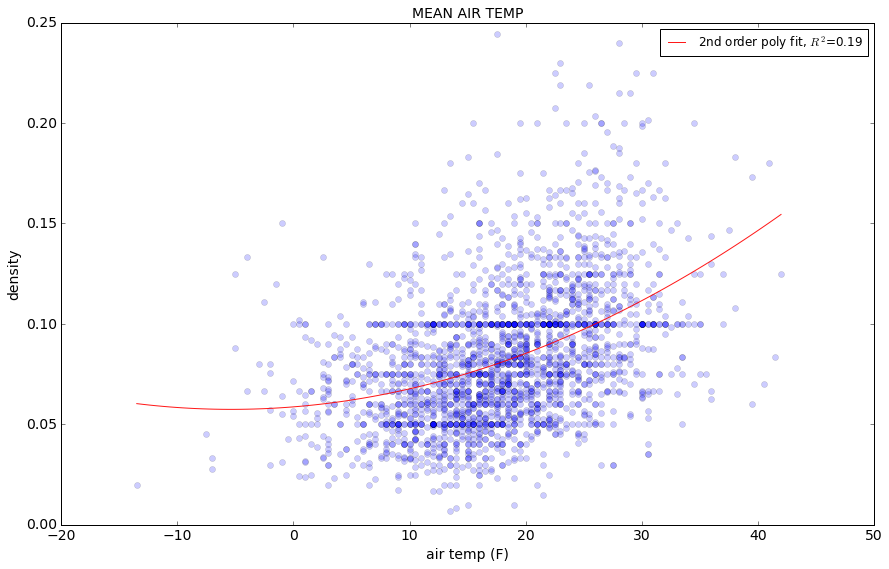

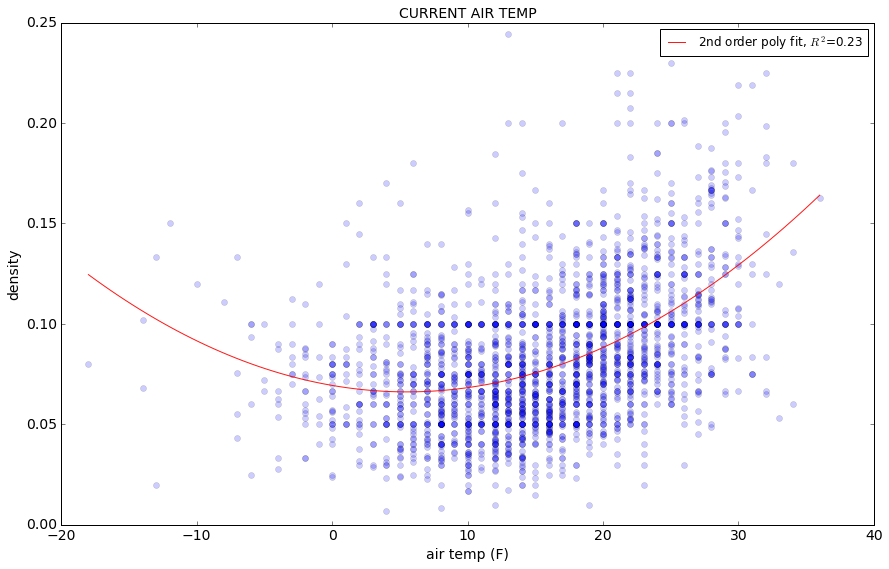

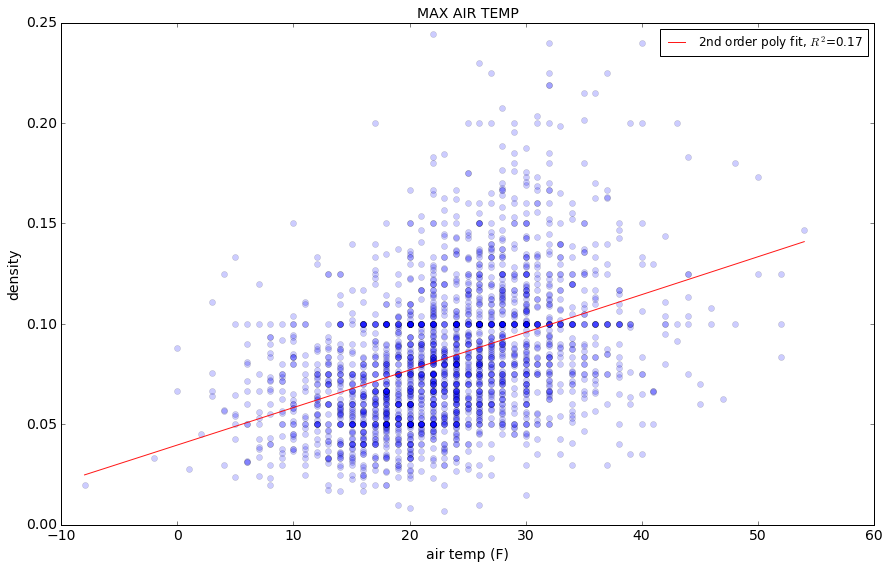

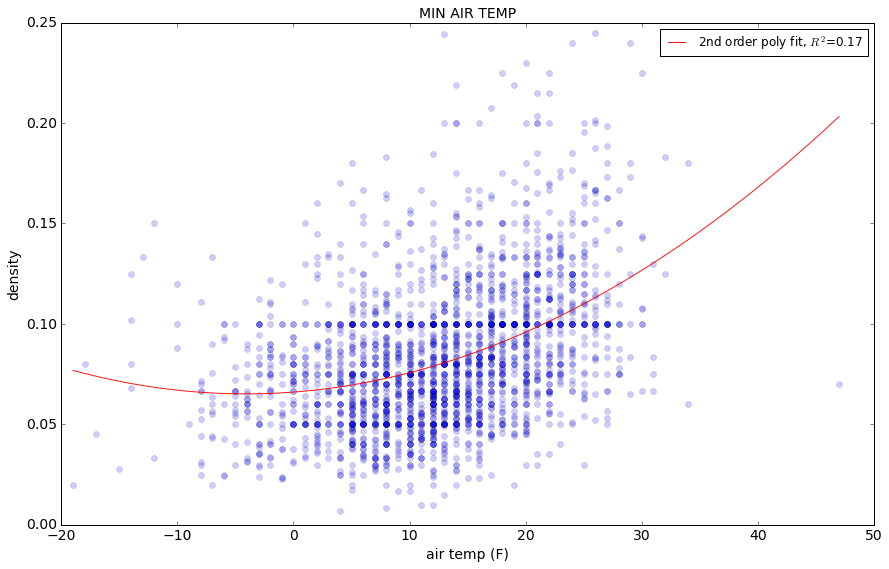

In [7]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('MEAN AIR TEMP', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced on temp
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1.temp, poly_2.predict(x1), 'r-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
         
plt.legend()

d = {'temp': x_current, 'dens': y_current}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('CURRENT AIR TEMP', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced on temp
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1.temp, poly_2.predict(x1), 'r-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
         
plt.legend()

d = {'temp': x_max, 'dens': y_max}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('MAX AIR TEMP', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced on temp
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1.temp, poly_2.predict(x1), 'r-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
         
plt.legend()

d = {'temp': x_min, 'dens': y_min}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('MIN AIR TEMP', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced on temp
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1.temp, poly_2.predict(x1), 'r-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, 
         alpha=0.9)
         
plt.legend()

Considering that precip events happen at any time throughout a 24-hr period, with possible large increasese/decreases in temperatures with frontal passages, it makes the most sense to use mean air temp for this analysis. (not a considerable difference in R<sup>2</sup> values)

## Histogram of density

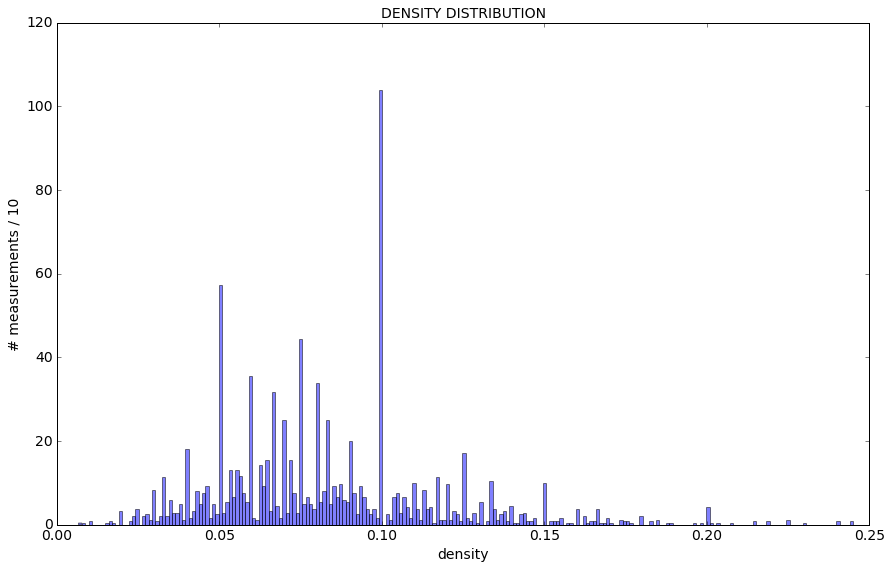

In [8]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)
histoplot(df.dens, 'DENSITY DISTRIBUTION')

There is obvious artificial bias towards 0.10 and 0.05 (and somewhat towards 0.15 and 0.20).

## Assess statistical significance of 2nd order polynomial fit for mean air temp

**Plot confidence interval, prediction interval, and calculate p-value, S-value**

POLY2 SUMMARY:                             OLS Regression Results                            
Dep. Variable:                   dens   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     269.8
Date:                Tue, 01 Mar 2016   Prob (F-statistic):          4.55e-106
Time:                        15:37:50   Log-Likelihood:                 4753.4
No. Observations:                2323   AIC:                            -9501.
Df Residuals:                    2320   BIC:                            -9483.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0587    

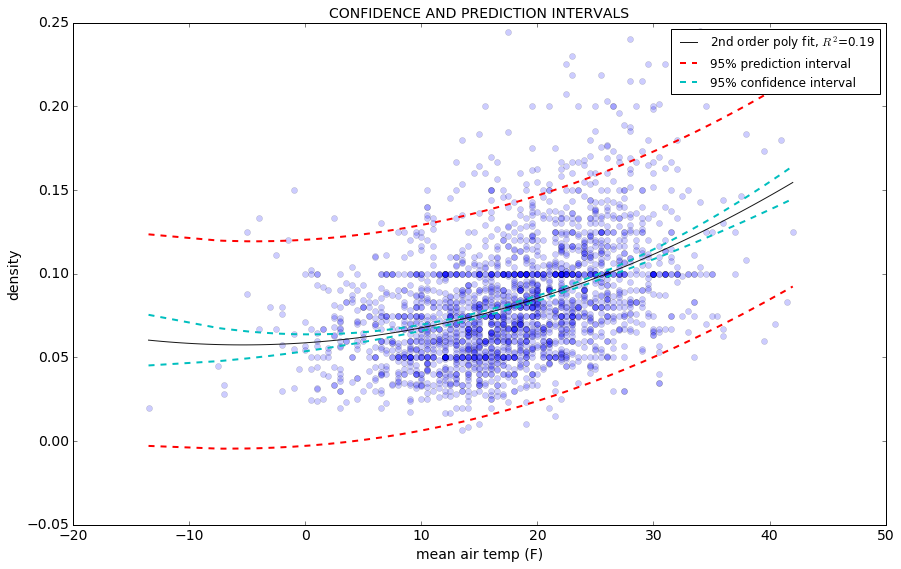

In [9]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)

plt.figure(figsize=(9 * 1.618, 9))
#plt.scatter(df.temp,df.dens, s=12, alpha=0.3, label='')
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0, label='')
plt.xlabel('mean air temp (F)', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('CONFIDENCE AND PREDICTION INTERVALS', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)

# points linearly spaced for predictor variable
x1 = pd.DataFrame({'temp': np.linspace(df.temp.min(), df.temp.max(), 100)})

# 2nd order polynomial
poly_2 = smf.ols(formula='dens ~ 1 + temp + I(temp ** 2.0)', data=df).fit()
plt.plot(x1, poly_2.predict(x1), 'k-', label='2nd order poly fit, $R^2$=%.2f' % poly_2.rsquared, alpha=0.9)

prstd, iv_l, iv_u = wls_prediction_std(poly_2)

from statsmodels.stats.outliers_influence import summary_table

st, data, ss2 = summary_table(poly_2, alpha=0.05)

fittedvalues = data[:,2]
predict_mean_se  = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

# check we got the right things
#print np.max(np.abs(poly_2.fittedvalues - fittedvalues))
#print np.max(np.abs(iv_l - predict_ci_low))
#print np.max(np.abs(iv_u - predict_ci_upp))

data_intervals = {'temp': df.temp, 'predict_low': predict_ci_low,
                  'predict_upp': predict_ci_upp, 'conf_low': predict_mean_ci_low, 'conf_high': predict_mean_ci_upp}
df_intervals = pd.DataFrame(data=data_intervals)

df_intervals_sort = df_intervals.sort_values(by='temp')

plt.plot(df_intervals_sort.temp, df_intervals_sort.predict_low,
         color='r', linestyle='--', linewidth=2, label='95% prediction interval')
plt.plot(df_intervals_sort.temp, df_intervals_sort.predict_upp, color='r', linestyle='--', linewidth=2, label='')
plt.plot(df_intervals_sort.temp, df_intervals_sort.conf_low,
         color='c', linestyle='--', linewidth=2, label='95% confidence interval')
plt.plot(df_intervals_sort.temp, df_intervals_sort.conf_high, color='c', linestyle='--', linewidth=2, label='')

plt.legend()

print 'POLY2 SUMMARY: %s' % poly_2.summary()

# Use standard numpy functions to check R^2 and S values
x = df.temp
y = df.dens
n = np.max(x.shape)    # the number of observations
X = np.vstack([np.ones(n), x]).T

print ''
print 'n=%s' % n
print ''

model, resid = np.polyfit(x,y,1,full=True)[:2] # 1st order poly
r2 = 1 - resid / (y.size * y.var())
print 'r2 1st-order: %s' %r2

std_error = np.sqrt(resid/(n-2)) # residual standard error
print 'S 1st-order %s:' % std_error

model, resid = np.polyfit(x,y,2,full=True)[:2] # 2nd order poly
r2 = 1 - resid / (y.size * y.var())
print 'r2 2nd-order: %s' %r2

std_error = np.sqrt(resid/(n-3)) # residual standard error
print 'S 2nd-order %s:' % std_error

# Get residual array for plotting
resid_array = (np.polyval(np.polyfit(x, y, 2), x) - y)
sorted_resid_array = np.sort(resid_array,axis=0)


We see that the **95% confidence interval** is fairly tight. This indicates that the model is an accurate representation of the *mean* of the response variable (density) for any given temperature.

However, the **95% prediction interval** has a large range, reflecting the large variability of the data. This indicates that a single new observation of density for any given temperature can deviate +/- ~0.06 from the model line (with 95% confidence). (e.g., at 21 degrees F, density from the model fit is ~0.10, but can range  ~0.04 - 0.16)

**p-value = 0.112** The p-value reported for the coefficient of the 1st-order term is 0.112. This is >0.05, therefore the fit is *not* statistically significant. Some studies use p = 0.10 as the threshold for significance, so this is not neccesarily indicating a poor fit, but is not statistically significant by definition.

**S (standard error of the regression) = 0.03**  This is the average distance that the observed density values fall from the regression line. So, on average, a single new observation will range +/- 0.03 from the model.

**R<sup>2</sup> = 0.19**  Or, 19% of the density variation is explained by the model.

*A note on standard errors:* the standard error (SE) of the coefficients reported in the POLY2 SUMMARY are different than the SE of the regression. The SE of the coefficients is the precision of the estimate of the coefficient. The SE of the regression (the "S-value") is the average distance that the observed values fall from the regression line. (2 * S) is an approximation of the 95% prediction interval.

## Plot the residuals, and assess normal distribution

**All analysis above assumes the residuals are normally distributed!**

((array([-3.43311909, -3.18484206, -3.04728966, ...,  3.04728966,
          3.18484206,  3.43311909]),
  array([-0.16408263, -0.13772977, -0.1343815 , ...,  0.0781033 ,
          0.07844706,  0.08452356])),
 (0.030718731909816589, 3.3750018807676471e-17, 0.98112730794042535))

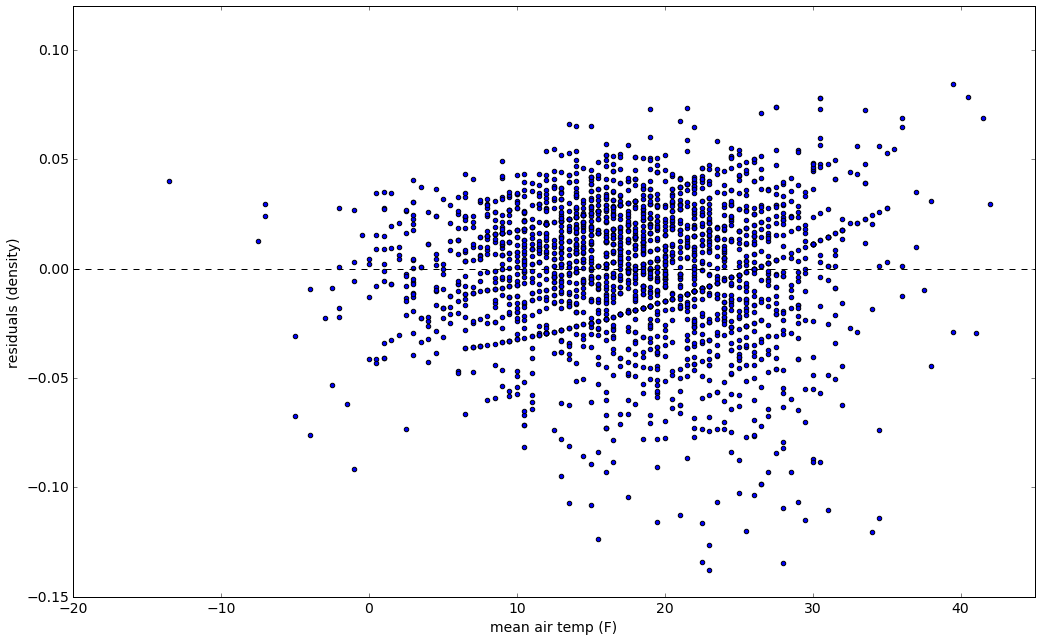

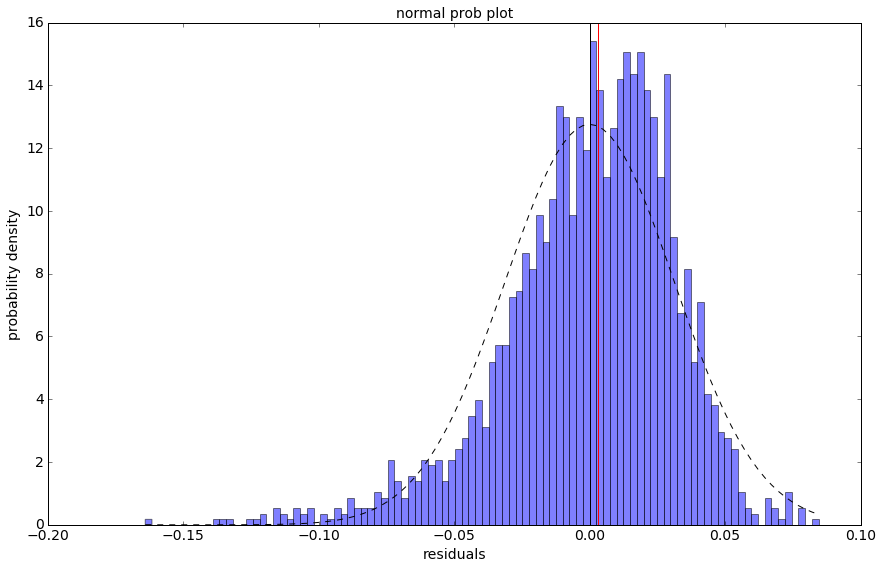

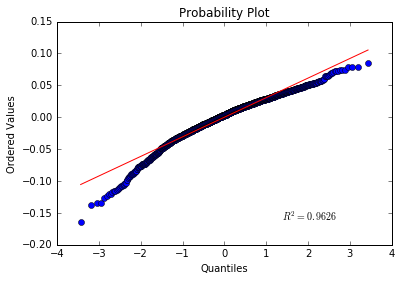

In [10]:
# RESIDUALS:
fig4 = plt.figure(figsize=(9 * 1.618, 9))
ax1 = fig4.add_subplot(111)
ax1.scatter(x, resid_array)
plt.axhline(y=0.0, color='k', linestyle='dashed')
ax1.set_ylabel('residuals (density)', fontsize=14)
ax1.set_xlabel('mean air temp (F)', fontsize=14)
ax1.set_title('')
ax1.set_xlim([-20, 45])
ax1.set_ylim([-0.15, 0.12])
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
fig4.tight_layout()  # Make the figure use all available whitespace
histoplot_normal(resid_array, 'normal prob plot')

fig10 = plt.figure()
measurements = resid_array   
stats.probplot(measurements, dist="norm", plot=pylab)

The **1st plot** of the residuals does not show any obvious patterns (besides the repeated 0.10 entries which we already know about).

The **2nd plot** shows a histogram of the residuals to assess for normality. The dashed line is the normal distribution (Gaussian) expected for the mean and standard deviation of the residuals dataset. We can see that the distribution resembles a normal distribution fairly well, but is shifted slightly right (the red line is the median -- which is shifted slightly right of the dataset mean), has a more peaked center, and has a bit of a tail to negative values.

The **3rd plot** is an additional standard technique to assess for normal distribution. The ordered residuals are plotted against a gaussian distribution of quantiles. The close to linear fit indicates a mostly normally-distributed dataset.

**Summary: The residuals are close to normally distributed -- therefore least squares regression techniques do apply to this data.**

## Perform Quantile Regression

## 1st-order (linear):

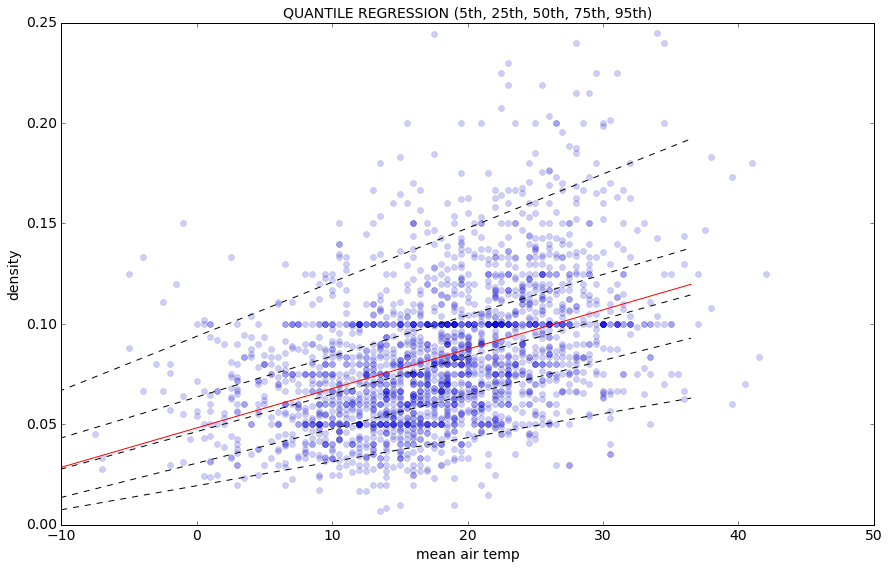

In [11]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)

mod = smf.quantreg('dens ~ temp', df)

quantiles = [.05, .25, .50, .75, .95]
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['temp']] + res.conf_int().ix['temp'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

ols = smf.ols('dens ~ temp', df).fit()
ols_ci = ols.conf_int().ix['temp'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['temp'],
           lb = ols_ci[0],
           ub = ols_ci[1])

plt.figure(figsize=(9 * 1.618, 9))
x = np.arange(df.temp.min(), df.temp.max(), 50)

get_y = lambda a, b: a + b * x

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    plt.plot(x, y, linestyle='--', color='black', zorder=1)

y = get_y(ols['a'], ols['b'])

plt.plot(x, y, color='red', zorder=2)

plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0)
plt.xlim((-10, 50))
plt.ylim((0, 0.25))
#plt.legend()
plt.xlabel('mean air temp', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('QUANTILE REGRESSION (5th, 25th, 50th, 75th, 95th)', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


** Red line: 2nd-order poly fit; black dashed lines: 5th, 25th, 50th, 75th, 95th quartiles of the regression**


## 2nd-order:

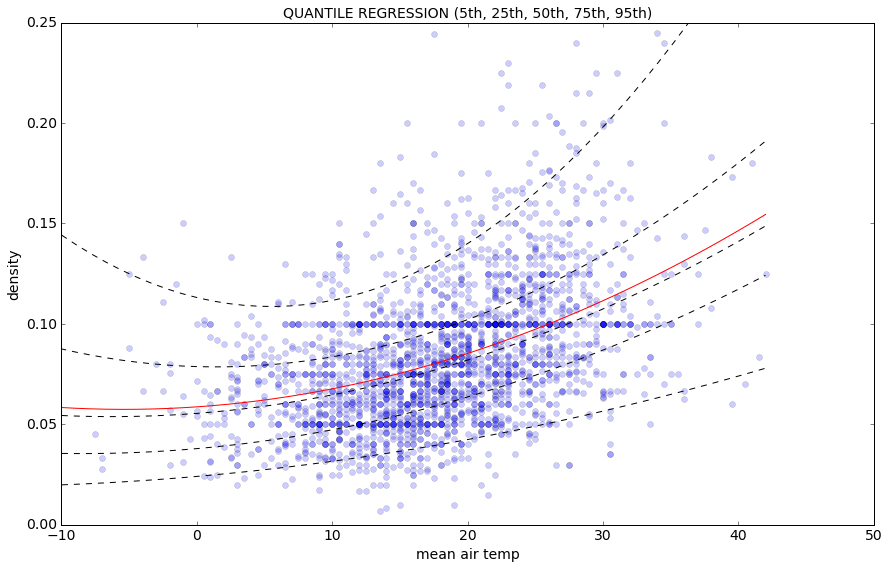

In [12]:
d = {'temp': x_mean, 'dens': y_mean}
df = pd.DataFrame(data=d)

mod = smf.quantreg('dens ~ temp + I(temp ** 2.0)', df)

quantiles = [.05, .25, .50, .75, .95]

# get all result instances in a list
res_all = [mod.fit(q=q) for q in quantiles]

res_ols = smf.ols('dens ~ temp + I(temp ** 2.0)', df).fit()


plt.figure(figsize=(9 * 1.618, 9))

# create x for prediction
x_p = np.linspace(df.temp.min(), df.temp.max(), 50)
df_p = pd.DataFrame({'temp': x_p})

for qm, res in zip(quantiles, res_all):
    # get prediction for the model and plot
    # here we use a dict which works the same way as the df in ols
    plt.plot(x_p, res.predict({'temp': x_p}), linestyle='--', lw=1, 
             color='k', label='q=%.2F' % qm, zorder=2)
    
y_ols_predicted = res_ols.predict(df_p)
plt.plot(x_p, y_ols_predicted, color='red', zorder=1)
#plt.scatter(df.temp, df.dens, alpha=.2)
plt.plot(df.temp, df.dens, 'o', alpha=.2, zorder=0)
plt.xlim((-10, 50))
plt.ylim((0, 0.25))
#plt.legend(loc="upper center")
plt.xlabel('mean air temp', fontsize=14)
plt.ylabel('density', fontsize=14)
plt.title('QUANTILE REGRESSION (5th, 25th, 50th, 75th, 95th)', fontsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)


** Red line: 2nd-order poly fit; black dashed lines: 5th, 25th, 50th, 75th, 95th quartiles of the regression**



## Equations for 1st-order linear and 2nd-order polynomial fits

In [13]:
p1_mean = np.poly1d(np.polyfit(df.temp, df.dens, 1))
print p1_mean

 
0.001959 x + 0.04823


In [14]:
p2_mean = np.poly1d(np.polyfit(df.temp, df.dens, 2))
print p2_mean

           2
4.324e-05 x + 0.0004646 x + 0.05871


**Now we have equations for the lines, enabling calculation of density from air temperature.
(y = density and x = air temp):**

**1st-order linear fit:**

y = 0.04823 + 0.001959 x

**2nd-order polynomial fit:**

y = 0.05871 + 0.0004646 x + 4.324e-05 x<sup>2</sup>